# Level-1 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
new_df = pd.read_csv("car_price_new.csv")


In [3]:
df=new_df.fillna(new_df.mode().iloc[0])


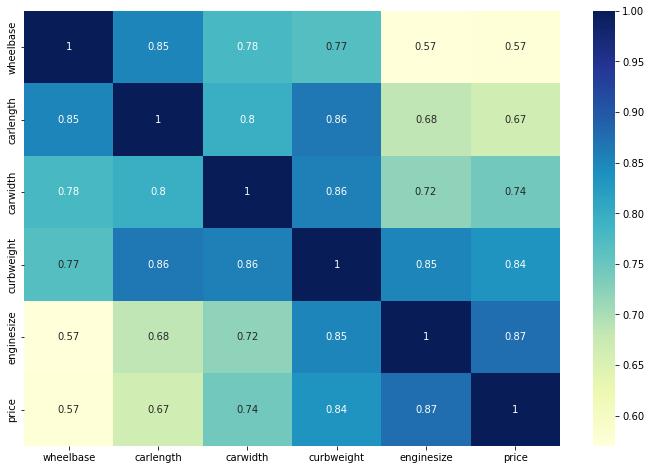

In [4]:
import seaborn as sns

correlation_matrix = df.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

# Level-2

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X = df.iloc[:,4].values.reshape(-1,1)
y = df.iloc[:,5].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [7]:
import sklearn.metrics as sm
import numpy as np 

print("R2 score =", round(sm.r2_score(y_test, y_pred)*100, 2),"%")

R2 score = 78.25 %


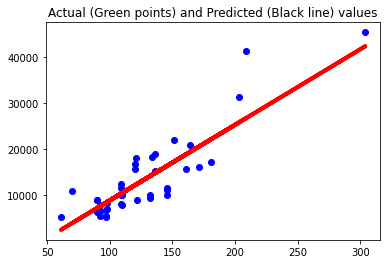

In [8]:
# Plot outputs
plt.title('Actual (Green points) and Predicted (Black line) values')
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=4)
plt.show()


# Level-3

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X = df.iloc[:,1:4].values
y = df.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [11]:
import sklearn.metrics as sm
import numpy as np 

print("R2 score =", round(sm.r2_score(y_test, y_pred)*100, 2),"%")

R2 score = 77.69 %


In [26]:
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.3)

# Train Support Vector Regressor
sv_regressor.fit(X_train, y_train)

# Evaluate performance of Support Vector Regressor
y_test_pred = sv_regressor.predict(X_test)
evs = explained_variance_score(y_test, y_test_pred) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred)*100, 2),"%")


R2 score = 72.18 %
